In [6]:
%reload_ext autoreload
%autoreload 2

# from src.db import DB
from src.db_manager import DB
import pandas as pd
import numpy as np
from functools import partial
from src.backtest import Backtest
from src.pattern import Bollinger, Default
import FinanceDataReader as fdr
from marcap import marcap_data

# DB 작업

In [ ]:
DB().collect()

build:   0%|          | 0/3757 [00:00<?, ?it/s]

In [14]:
DB().build()

build_fields:   0%|          | 0/8 [00:00<?, ?it/s]

In [15]:
pd.read_parquet("data/005930.parquet")

,open,high,low,close,volume,amount,marketcap,shares
date,,,,,,,,
1999-12-28,5200.0,5560.0,5050.0,5320.0,1481697,3.919334e+11,3.985711e+13,149838777
2000-01-04,6000.0,6110.0,5660.0,6110.0,1483967,4.442332e+11,4.577575e+13,149838777
2000-01-05,5800.0,6060.0,5520.0,5580.0,1493604,4.337834e+11,4.180502e+13,149838777
2000-01-06,5750.0,5780.0,5580.0,5620.0,1087810,3.080053e+11,4.210470e+13,149838777
2000-01-07,5560.0,5670.0,5360.0,5540.0,806195,2.227178e+11,4.150534e+13,149838777
...,...,...,...,...,...,...,...,...
2025-12-23,110900.0,112500.0,110400.0,111500.0,20419187,2.280880e+12,6.600396e+14,5919637922
2025-12-24,112400.0,112400.0,110900.0,111100.0,12492939,1.392948e+12,6.576718e+14,5919637922
2025-12-26,112400.0,117000.0,112400.0,117000.0,34018174,3.930508e+12,6.925976e+14,5919637922


In [16]:
pd.read_parquet("db/close.parquet")

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000120,...,900150,900180,900250,900260,900270,900280,900290,900300,900310,900340
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,NaN,836.0,7752.0,3930.0,2611.0,45739.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,50211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,51227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,48381.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,49601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,NaN,6410.0,NaN,476.0,9410.0,NaN,62100.0,18980.0,116200.0,93700.0,...,NaN,NaN,703.0,1571.0,192.0,NaN,3090.0,265.0,577.0,827.0
2025-12-24,NaN,6430.0,NaN,481.0,9080.0,NaN,62000.0,19000.0,115200.0,95200.0,...,NaN,NaN,710.0,1571.0,201.0,NaN,3065.0,262.0,574.0,811.0
2025-12-26,NaN,6380.0,NaN,474.0,9480.0,NaN,63000.0,18940.0,112700.0,94400.0,...,NaN,NaN,713.0,1571.0,199.0,NaN,3020.0,255.0,572.0,792.0


In [18]:
DB().load(field="close")

,000010,000020,000030,000040,000050,000060,000070,000080,000100,000120,...,900150,900180,900250,900260,900270,900280,900290,900300,900310,900340
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,NaN,836.0,7752.0,3930.0,2611.0,45739.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,50211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,51227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,48381.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,49601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,NaN,6410.0,NaN,476.0,9410.0,NaN,62100.0,18980.0,116200.0,93700.0,...,NaN,NaN,703.0,1571.0,192.0,NaN,3090.0,265.0,577.0,827.0
2025-12-24,NaN,6430.0,NaN,481.0,9080.0,NaN,62000.0,19000.0,115200.0,95200.0,...,NaN,NaN,710.0,1571.0,201.0,NaN,3065.0,262.0,574.0,811.0
2025-12-26,NaN,6380.0,NaN,474.0,9480.0,NaN,63000.0,18940.0,112700.0,94400.0,...,NaN,NaN,713.0,1571.0,199.0,NaN,3020.0,255.0,572.0,792.0


# 백테스트

In [19]:
start = "2000-01-01"
end = "2025-12-31"
bt = Backtest(start, end, benchmark=Default(name='benchmark'))

codes:   0%|          | 0/3499 [00:00<?, ?it/s]

In [25]:
boll = Bollinger(narrow_width=0.03, narrow_stay_days=5, name='boll').high(window=252, threshold=0.90)
stats = bt.run(boll)
stats.to_frame()

codes:   0%|          | 0/3499 [00:00<?, ?it/s]

count  arith_mean  geom_mean  rise_prob
pattern   period scope                                                
benchmark 1W     overall  11490693.0    0.002614  -0.001247   0.462506
          2W     overall  11459341.0    0.005276  -0.002242   0.463692
          3W     overall  11432267.0    0.007980  -0.003186   0.463306
          1M     overall  11410343.0    0.010665  -0.004152   0.461397
          2M     overall  11332168.0    0.020445  -0.008009   0.459408
          3M     overall  11257941.0    0.029266  -0.011834   0.456440
          6M     overall  11042527.0    0.058772  -0.020638   0.451731
boll      1W     overall      6451.0    0.007438   0.006241   0.486591
          2W     overall      6406.0    0.012375   0.010141   0.502654
          3W     overall      6368.0    0.016822   0.013547   0.507538
          1M     overall      6340.0    0.020197   0.015876   0.519716
          2M     overall      6227.0    0.037495   0.026462   0.540870
          3M     overall      6145.0    0.051082   0.033326   0.553621
          6M     overall      6003.0    0.098375   0.063499   0.579044

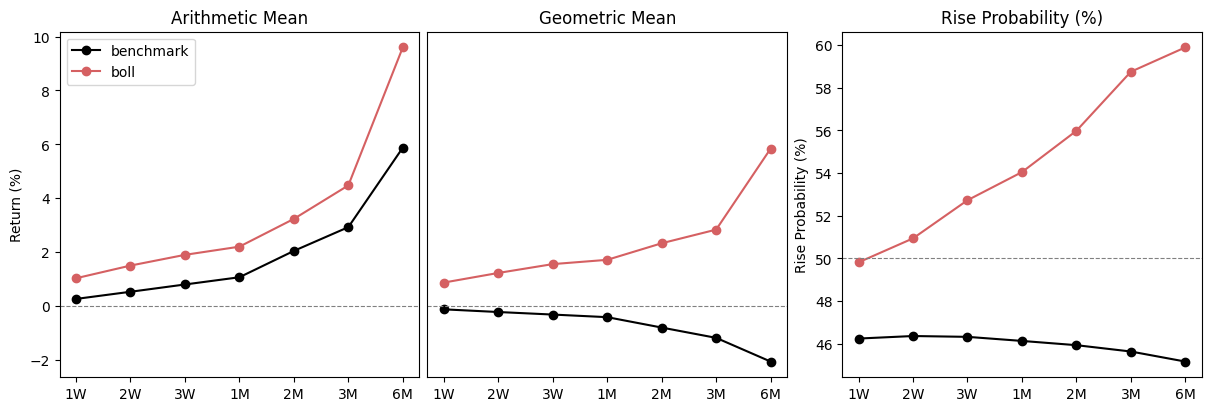

In [22]:
stats.plot(start='2000-01-01', end='2025-12-31');

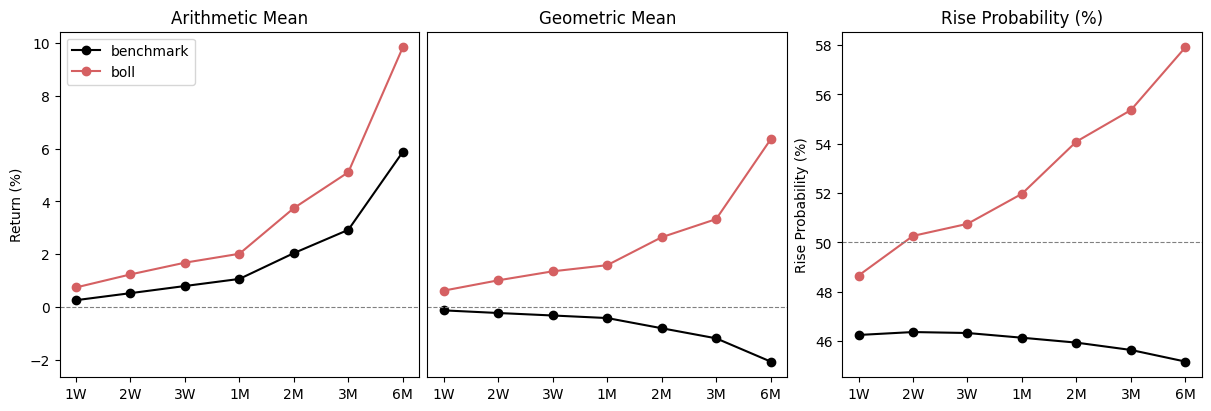

In [26]:
stats.plot(start='2000-01-01', end='2025-12-31');

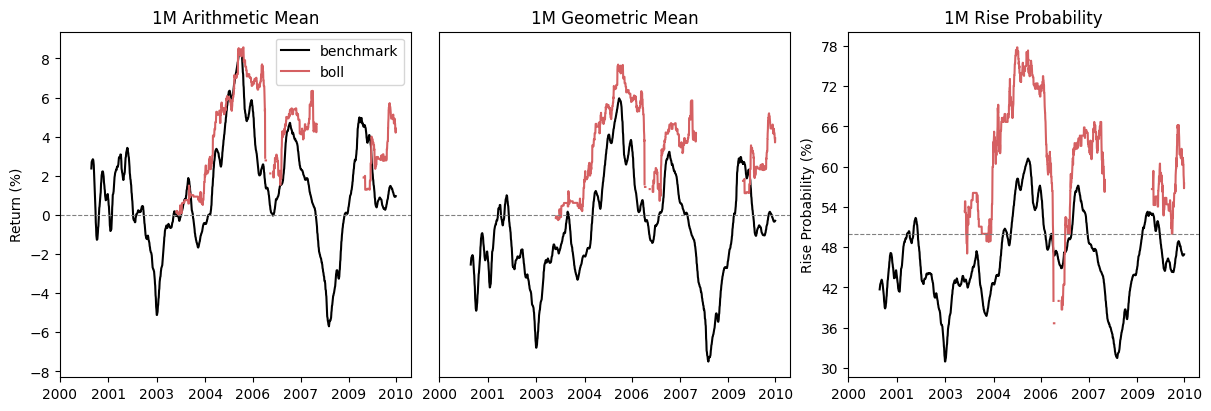

In [23]:
stats.plot_history(horizon='1M', start='2000-01-01', end='2010-12-31');

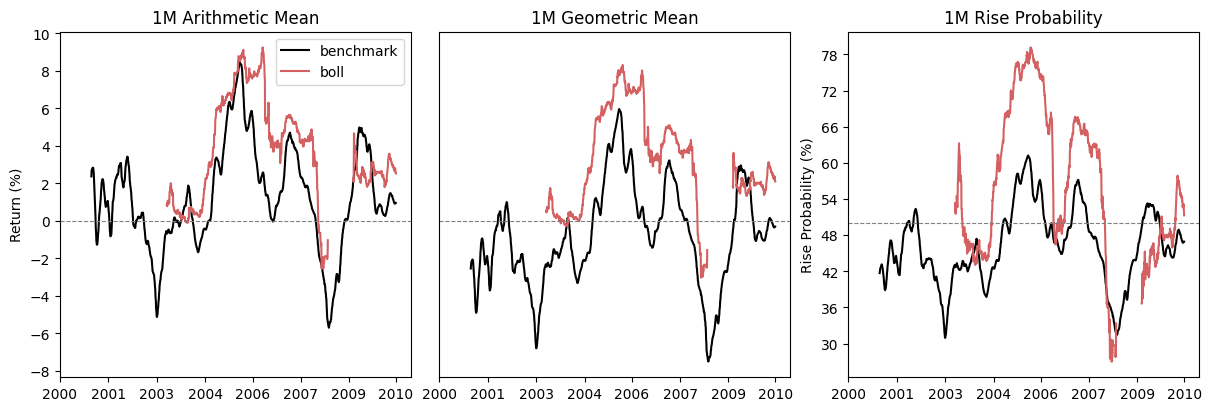

In [27]:
stats.plot_history(horizon='1M', start='2000-01-01', end='2010-12-31');

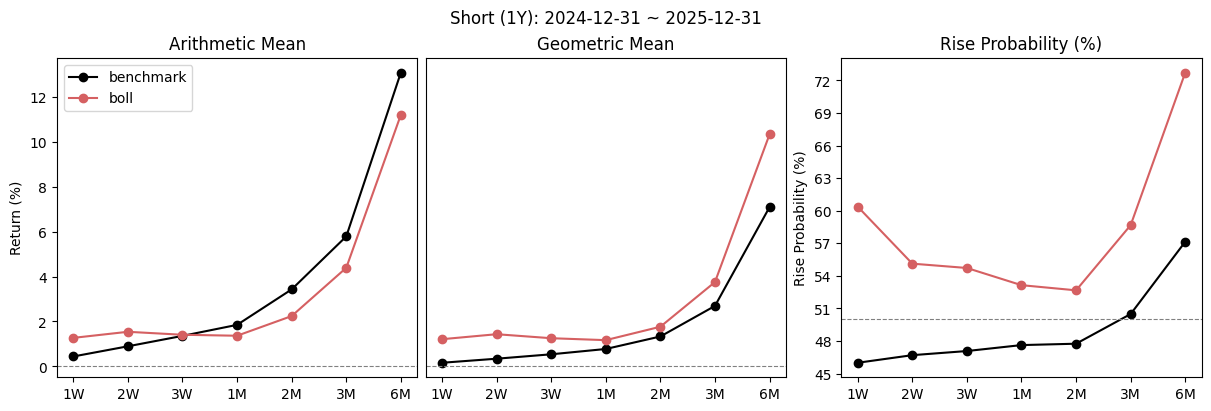

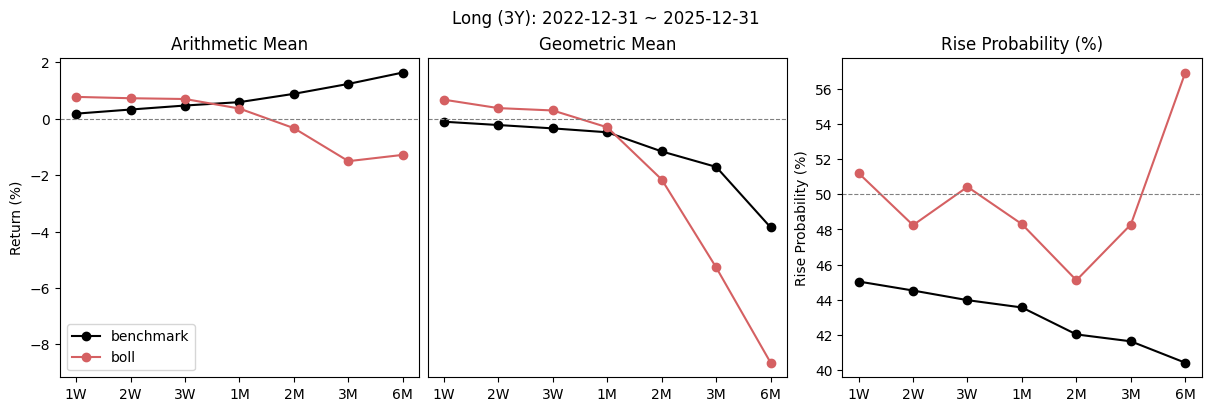

In [24]:
stats.plot_compare(asof="2025-12-31", short="1Y", long="3Y");

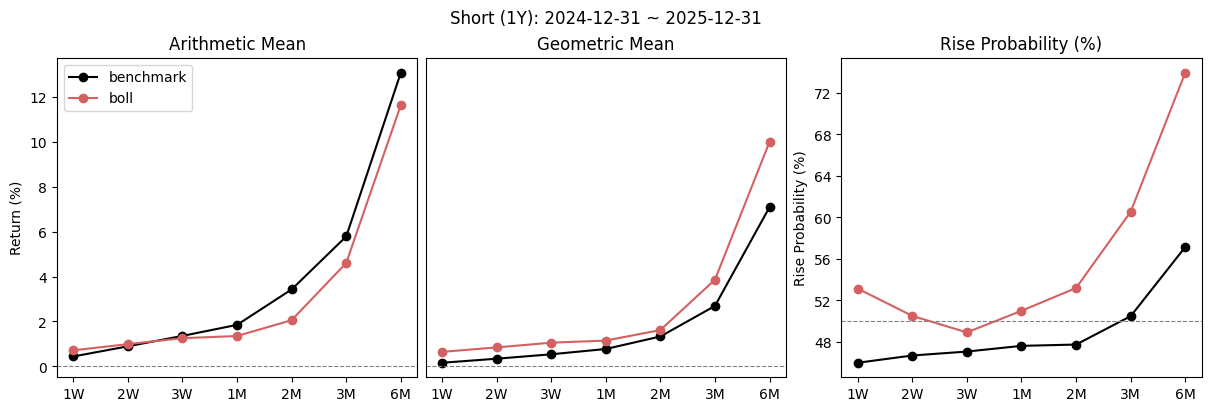

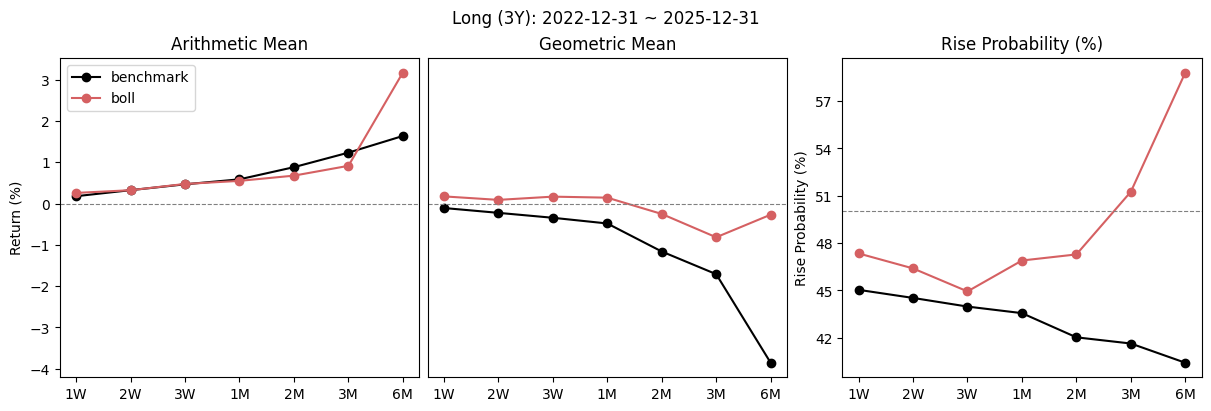

In [28]:
stats.plot_compare(asof="2025-12-31", short="1Y", long="3Y");